<a href="https://colab.research.google.com/github/li199959/one/blob/main/%E6%8A%A5%E5%91%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import json

# Load the json file
with open("trainer_state.json", "r") as file:
    data = json.load(file)

# Display the keys in the json file to understand its structure
data.keys()


dict_keys(['best_metric', 'best_model_checkpoint', 'epoch', 'global_step', 'is_hyper_param_search', 'is_local_process_zero', 'is_world_process_zero', 'log_history', 'max_steps', 'num_train_epochs', 'total_flos', 'trial_name', 'trial_params'])

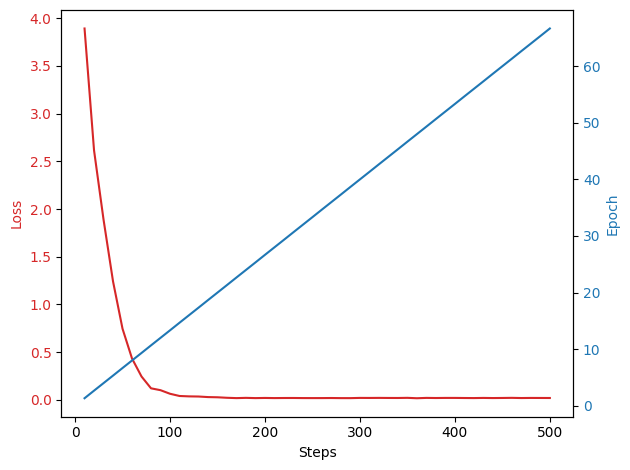

In [11]:
# Extract data only from entries that have 'loss'
epochs = [entry['epoch'] for entry in data['log_history'] if 'loss' in entry]
losses = [entry['loss'] for entry in data['log_history'] if 'loss' in entry]
steps = [entry['step'] for entry in data['log_history'] if 'loss' in entry]

# Create figure and axis
fig, ax1 = plt.subplots()

# Plot loss
color = 'tab:red'
ax1.set_xlabel('Steps')
ax1.set_ylabel('Loss', color=color)
ax1.plot(steps, losses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create second axis for epochs
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Epoch', color=color)
ax2.plot(steps, epochs, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
fig.tight_layout()
plt.show()


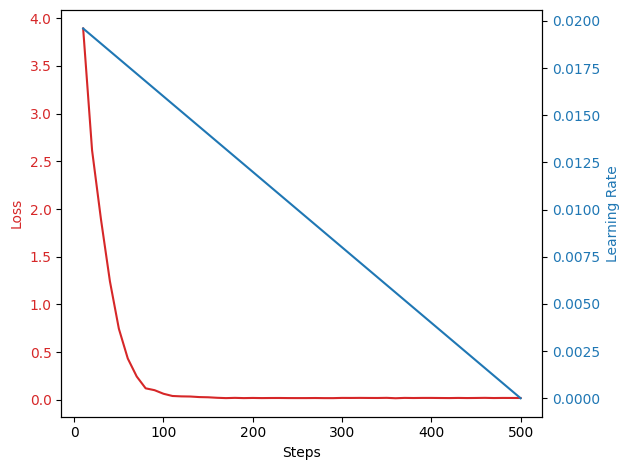

In [12]:
# Extract learning rate data from entries that have 'learning_rate'
learning_rates = [entry['learning_rate'] for entry in data['log_history'] if 'learning_rate' in entry]

# Create figure and axis
fig, ax1 = plt.subplots()

# Plot loss
color = 'tab:red'
ax1.set_xlabel('Steps')
ax1.set_ylabel('Loss', color=color)
ax1.plot(steps, losses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create second axis for learning rate
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Learning Rate', color=color)
ax2.plot(steps, learning_rates, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
fig.tight_layout()
plt.show()
